In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import seawater as sw
from seawater.library import T90conv
from scipy import stats

import ncar_jobqueue
from dask.distributed import Client

Note: this notebook uses annual means for all 5 IAFs.

These means were made using this notebook:
/glade/u/home/kristenk/besome/alk-calc_transient_response/make_annual_mean_tseries.ipynb

### get DIC control

In [2]:
case='cesm22cocco.G1850ECOIAF.T62_g17.003'

In [3]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC.0001-0062.nc'
ds_dic_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [4]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC.0063-0124.nc'
ds_dic_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [5]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC.0125-0186.nc'
ds_dic_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [6]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC.0187-0248.nc'
ds_dic_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [7]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC.0249-0310.nc'
ds_dic_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [8]:
ds_dic = xr.concat([ds_dic_1, ds_dic_2, ds_dic_3, ds_dic_4, ds_dic_5], 'time')

### get DIC noGCB

In [9]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0001-0062.nc'
ds_dic_noGCB1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [10]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0063-0124.nc'
ds_dic_noGCB2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [11]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0125-0186.nc'
ds_dic_noGCB3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [12]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0187-0248.nc'
ds_dic_noGCB4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [13]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0249-0310.nc'
ds_dic_noGCB5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [14]:
ds_dic_noGCB = xr.concat([ds_dic_noGCB1, ds_dic_noGCB2, ds_dic_noGCB3, ds_dic_noGCB4, ds_dic_noGCB5], 'time')

### get DIC with 2x GCB

In [15]:
case='cesm22cocco.G1850ECOIAF.T62_g17.004'

In [16]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0001-0062.nc'
ds_dic_2xGCB1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [17]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0063-0124.nc'
ds_dic_2xGCB2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [18]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0125-0186.nc'
ds_dic_2xGCB3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [19]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0187-0248.nc'
ds_dic_2xGCB4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [20]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0249-0310.nc'
ds_dic_2xGCB5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [21]:
ds_dic_2xGCB = xr.concat([ds_dic_2xGCB1, ds_dic_2xGCB2, ds_dic_2xGCB3, ds_dic_2xGCB4, ds_dic_2xGCB5], 'time')

### get DIC with 100m dissolution length scale

In [22]:
case='cesm22cocco.G1850ECOIAF.T62_g17.009'

In [23]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0001-0062.nc'
ds_dic_100mDLS1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [24]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0063-0124.nc'
ds_dic_100mDLS2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [25]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0125-0186.nc'
ds_dic_100mDLS3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [26]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0187-0248.nc'
ds_dic_100mDLS4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [27]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0249-0310.nc'
ds_dic_100mDLS5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [28]:
ds_dic_100mDLS = xr.concat([ds_dic_100mDLS1, ds_dic_100mDLS2, ds_dic_100mDLS3, ds_dic_100mDLS4, ds_dic_100mDLS5], 'time')

### get DIC with 1000m dissolution 

In [29]:
case='cesm22cocco.G1850ECOIAF.T62_g17.010'

In [30]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0001-0062.nc'
ds_dic_1000mDLS1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [31]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0063-0124.nc'
ds_dic_1000mDLS2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [32]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0125-0186.nc'
ds_dic_1000mDLS3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [33]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0187-0248.nc'
ds_dic_1000mDLS4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [34]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.DIC_ALT_CO2.0249-0310.nc'
ds_dic_1000mDLS5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [35]:
ds_dic_1000mDLS = xr.concat([ds_dic_1000mDLS1, ds_dic_1000mDLS2, ds_dic_1000mDLS3, ds_dic_1000mDLS4, ds_dic_1000mDLS5], 'time')

### Now we have everything we need

In [36]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2013_POPgrid.nc' 
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)
ds_woa['z_t'] = ds_dic_2xGCB5.z_t

In [1]:
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
area_m=ds_woa.TAREA * 1e-4
depths_m=ds_woa.z_t * 0.01
dz=ds_woa.dz
dz_m=ds_woa.dz * 0.01

NameError: name 'ds_woa' is not defined

### Total up DIC control

In [38]:
%%time
glb_DIC_ts = esmlab.weighted_sum(ds_dic.DIC, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_DIC_ts = esmlab.weighted_sum(glb_DIC_ts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_DIC_ts = glb_DIC_ts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 29.1 s, sys: 1min 19s, total: 1min 48s
Wall time: 2min 30s


### Total up DIC noGCB

In [39]:
%%time
glb_DIC_noGCBts = esmlab.weighted_sum(ds_dic_noGCB.DIC_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_DIC_noGCBts = esmlab.weighted_sum(glb_DIC_noGCBts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_DIC_noGCBts = glb_DIC_noGCBts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 26.9 s, sys: 51.4 s, total: 1min 18s
Wall time: 2min 14s


### Total up DIC 2xGCB

In [40]:
%%time
glb_DIC_2xGCBts = esmlab.weighted_sum(ds_dic_2xGCB.DIC_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_DIC_2xGCBts = esmlab.weighted_sum(glb_DIC_2xGCBts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_DIC_2xGCBts = glb_DIC_2xGCBts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 26.4 s, sys: 48.4 s, total: 1min 14s
Wall time: 2min 17s


### Total up DIC 100m DLS

In [41]:
%%time
glb_DIC_100mDLSts = esmlab.weighted_sum(ds_dic_100mDLS.DIC_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_DIC_100mDLSts = esmlab.weighted_sum(glb_DIC_100mDLSts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_DIC_100mDLSts = glb_DIC_100mDLSts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 26.4 s, sys: 49 s, total: 1min 15s
Wall time: 2min 14s


### Total up DIC 1000m DLS

In [42]:
%%time
glb_DIC_1000mDLSts = esmlab.weighted_sum(ds_dic_1000mDLS.DIC_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_DIC_1000mDLSts = esmlab.weighted_sum(glb_DIC_1000mDLSts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_DIC_1000mDLSts = glb_DIC_1000mDLSts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 26.4 s, sys: 49.8 s, total: 1min 16s
Wall time: 2min 23s


In [43]:
years=np.arange(1,311,1)
years = xr.DataArray(years,dims='time')

#### Plot a timeseries of DIC inventory

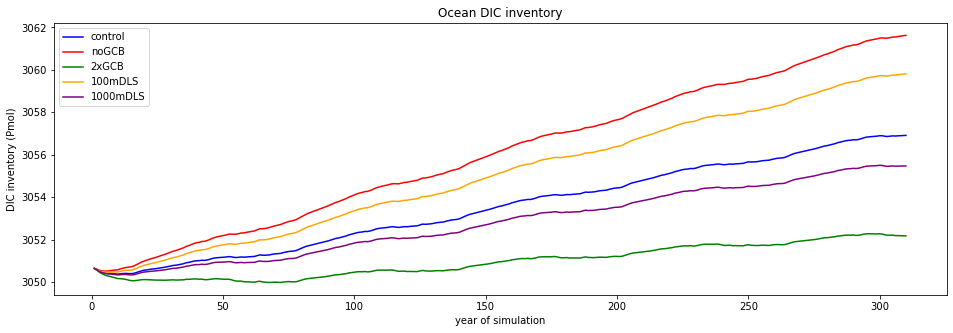

In [44]:
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Ocean DIC inventory')

ax.plot(years,glb_DIC_ts,color='blue', label='control')
ax.plot(years,glb_DIC_noGCBts,color='red', label='noGCB')
ax.plot(years,glb_DIC_2xGCBts,color='green', label='2xGCB')
ax.plot(years,glb_DIC_100mDLSts,color='orange', label='100mDLS')
ax.plot(years,glb_DIC_1000mDLSts,color='purple', label='1000mDLS')

ax.set(ylabel='DIC inventory (Pmol)',xlabel='year of simulation')
ax.legend()

### Find trend over the last 2 IAF cycles

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_DIC_ts.isel(time=slice(186,310)))
slope_control = slope

In [46]:
line_dic_control = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_dic_control[t] = slope_control * i + intercept
    t=t+1

In [47]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_DIC_noGCBts.isel(time=slice(186,310)))
slope_noGCB = slope

In [48]:
line_dic_noGCB = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_dic_noGCB[t] = slope_noGCB * i + intercept
    t=t+1

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_DIC_2xGCBts.isel(time=slice(186,310)))
slope_2xGCB = slope

In [50]:
line_dic_2xGCB = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_dic_2xGCB[t] = slope_2xGCB * i + intercept
    t=t+1

In [51]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_DIC_100mDLSts.isel(time=slice(186,310)))
slope_100mDLS = slope

In [52]:
line_dic_100mDLS = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_dic_100mDLS[t] = slope_100mDLS * i + intercept
    t=t+1

In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_DIC_1000mDLSts.isel(time=slice(186,310)))
slope_1000mDLS = slope

In [54]:
line_dic_1000mDLS = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_dic_1000mDLS[t] = slope_1000mDLS * i + intercept
    t=t+1

In [55]:
yr_2iaf=years.isel(time=slice(186,310))

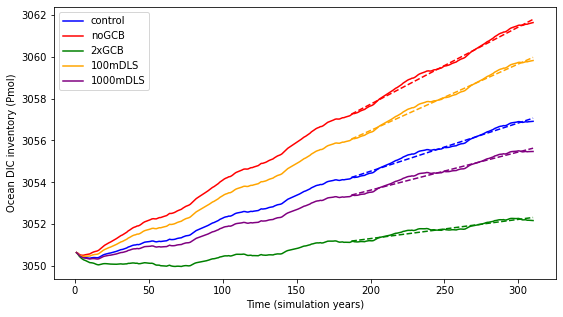

In [56]:
fig = plt.figure(figsize=(9,5))

ax = fig.add_subplot(1,1,1)
#ax.set_title('Ocean DIC inventory')

ax.plot(years,glb_DIC_ts,color='blue', label='control')
ax.plot(yr_2iaf,line_dic_control,'--',color='blue')

ax.plot(years,glb_DIC_noGCBts,color='red', label='noGCB')
ax.plot(yr_2iaf,line_dic_noGCB,'--',color='red')

ax.plot(years,glb_DIC_2xGCBts,color='green', label='2xGCB')
ax.plot(yr_2iaf,line_dic_2xGCB,'--',color='green')

ax.plot(years,glb_DIC_100mDLSts,color='orange', label='100mDLS')
ax.plot(yr_2iaf,line_dic_100mDLS,'--',color='orange')

ax.plot(years,glb_DIC_1000mDLSts,color='purple', label='1000mDLS')
ax.plot(yr_2iaf,line_dic_1000mDLS,'--',color='purple')

ax.set(ylabel='Ocean DIC inventory (Pmol)',xlabel='Time (simulation years)')
ax.legend()

fig.savefig('/glade/u/home/kristenk/besome/alk_calc_paper/Figs/DIC_inventory_tseries.pdf', bbox_inches='tight', format='pdf');


In [57]:
slopes = [slope_noGCB*1000., slope_100mDLS*1000., slope_control*1000., slope_1000mDLS*1000., slope_2xGCB*1000.]

In [63]:
slopes_norm = [slope_noGCB*1000.-slope_control*1000., 
              slope_100mDLS*1000.-slope_control*1000., 
              slope_control*1000.-slope_control*1000., 
              slope_1000mDLS*1000.-slope_control*1000., 
              slope_2xGCB*1000.-slope_control*1000.]

In [58]:
fluxes = [-12.91, -9.7, 0., 3.8, 12.91] #data calculated in emergent constraint notebook

In [59]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slopes,fluxes)

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slopes_norm,fluxes)

In [65]:
slope

-0.9524303630646803

In [66]:
intercept

-0.4516923842505852

In [67]:
slopes_norm

[13.78458922717228,
 8.69741136208533,
 0.0,
 -4.817180324784083,
 -13.841403645299897]